In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
X_train = pd.read_csv('ChemicalsSegregation/Logistic_X_Train.csv').values
Y_train = pd.read_csv('ChemicalsSegregation/Logistic_Y_Train.csv').values
X_test = pd.read_csv('ChemicalsSegregation/Logistic_X_Test.csv').values

In [34]:
print(X_train.shape,X_test.shape,Y_train.shape)

(3000, 3) (1000, 3) (3000, 1)


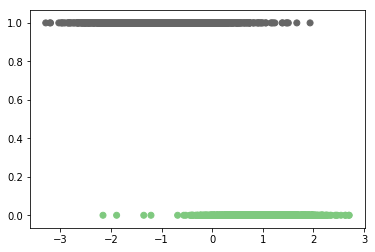

In [35]:
plt.scatter(X_train[:,2],Y_train,c=Y_train,cmap= plt.cm.Accent)
plt.show()

In [36]:
x_mean = X_train.mean(axis=0)
x_std = X_train.std(axis=0)

X_train = (X_train-x_mean)/x_std

In [37]:
X_test = (X_test-x_mean)/x_std

In [38]:
ones = np.ones((X_train.shape[0],1))
X_new_Train = np.hstack((ones,X_train))
X_new_Train.shape
Y_train = Y_train.reshape((-1,1))

In [39]:
ones = np.ones((X_test.shape[0],1))
X_new_Test = np.hstack((ones,X_test))
X_new_Test

array([[ 1.        , -0.58096727, -1.23196981, -2.10386172],
       [ 1.        , -0.93642077,  0.43931113, -0.36596031],
       [ 1.        ,  1.43773502,  0.91090225,  1.08581064],
       ...,
       [ 1.        , -0.89542577, -0.05073748, -0.67463414],
       [ 1.        , -0.40465638,  0.8263143 , -0.84593545],
       [ 1.        ,  0.39940977, -0.40861529,  0.29533219]])

In [40]:
#df.to_csv('ChemicalsSegregation/Submission.csv',index=False)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
model = LogisticRegression()

In [43]:
model.fit(X_new_Train,Y_train)

C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
print(model.intercept_)
print(model.coef_)

[-0.57502194]
[[-0.57502194 -4.9801214   3.04096898 -2.72093111]]


In [45]:
df = model.predict(X_new_Test)
df.shape

(1000,)

In [46]:
df = pd.DataFrame(df,columns=['label'],dtype='int16')
df

,label
0,1
1,1
2,0
3,1
4,1
...,...
995,0
996,0
997,1
998,1


In [31]:
#df.to_csv('ChemicalsSegregation/SubmissionSKLearn.csv',index=False)